<a href="https://colab.research.google.com/github/BiancaStadl/ProjektarbeitML/blob/main/01_working_trial_tfhub_multi_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hier umgesetzt:
laut Doku von https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4 und https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3


general tutorial: https://www.tensorflow.org/text/tutorials/classify_text_with_bert?hl=en

German pre-trained embeddings:
* https://nlp.johnsnowlabs.com/2021/05/20/distilbert_base_multilingual_cased_xx.html -> maybe

* multilingual https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4 inklusive pre-processing (extra laden, siehe Tut) https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3 

Was passiert hier?
Multilingual bert vom TensorFlowHub wird verwendet (noch nicht huggingface). Die Modelle vom TensorFlowHub sind leichter einzubinden, weil z. B. der eigenen PreProcessor geladen werden kann und man nicht händisch die Tokens CLS und SEP etc. hinzufügen muss, Masking passiert auch durch den PreProcessor, es wird demnach schon einfach viel im Vorhinein zur Verfügung gestellt, damit man ganz einfach fine-tunen kann. Damit beginne ich mal, bevor ich Huggingface mache.
also, ganz simpel: https://www.tensorflow.org/text/tutorials/classify_text_with_bert?hl=zh-TW#the_preprocessing_model

mit mehr Einstellungen: https://www.tensorflow.org/text/tutorials/fine_tune_bert?hl=zh-TW#preprocess_the_data und auch https://www.tensorflow.org/text/tutorials/bert_glue?hl=zh-TW


In [ ]:

import os
import re
import shutil
import string
import tensorflow as tf
import numpy as np
from keras import losses
from tensorflow import keras 
from keras import optimizers 
from keras import metrics 

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing


In [ ]:
import tensorflow_hub as hub

In [ ]:
url = "https://github.com/uds-lsv/GermEval-2018-Data/archive/master.zip"

dataset = tf.keras.utils.get_file("GermEval-2018-Data-master.zip", url, 
                                   extract=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'GermEval-2018-Data-master')


In [ ]:
#os.listdir(dataset_dir)

In [ ]:
training_file = os.path.join(dataset_dir, 'germeval2018.training.txt')
#with open(training_file) as f:
 # print(f.read())

#print()

testing_file = os.path.join(dataset_dir, 'germeval2018.test.txt')


In [ ]:
def remove_clutter(string):
   string = re.sub("@[^\s]+"," ",string)
   string = re.sub("#[^\s]+"," ", string)
   string = re.sub("\u00a9"," ", string)
   string = re.sub("\u00ae"," ", string)
   string = re.sub("[\u2000-\u3300]"," ", string)
   string = re.sub("\ud83c[\ud000-\udfff]"," ", string)
   string = re.sub("\ud83d[\ud000-\udfff]"," ", string)
   string = re.sub("\ud83e[\ud000-\udfff]"," ", string)
   string = re.sub("😜", " ",string)
   string = re.sub("🍫", " ",string)
   string = re.sub("😁", " ",string)
   string = re.sub("🐖", " ",string)
   string = re.sub("😡", " ",string)
   string = re.sub("😇", " ",string)
   string = re.sub("😬", " ",string)
   string = re.sub("😃", " ",string)
   string = re.sub("😂", " ",string)
   string = re.sub("💙", " ",string)  
   string = re.sub("😛", " ",string)
   string = re.sub("🙏", " ",string)
   string = re.sub("👍", " ",string)
   string = re.sub("🖕", " ",string)
   string = re.sub("😉", " ",string)
   string = re.sub("💩", " ",string)
   string = re.sub("🤢", " ",string)
   string = re.sub("👏", " ",string)
   string = re.sub("😨", " ",string)
   string = re.sub("🤣", " ",string)
   string = re.sub("🤡", " ",string)
   string = re.sub("😈", " ",string)
   string = re.sub("💃🏽", " ",string)
   string = re.sub("👹", " ",string)
   string = re.sub("🤘", " ",string)
   string = re.sub("😱", " ",string)
   string = re.sub("🤔", " ",string) 
   string = re.sub("🌈", " ",string) 
   string = re.sub("💕", " ",string) 
   string = re.sub("👩‍❤️‍👩", " ",string) 
   string = re.sub("😍", " ",string) 
   string = re.sub("👆", " ",string) 
   string = re.sub("😖", " ",string) 
   string = re.sub("👇", " ",string) 
   string = re.sub("🔥", " ",string) 
   string = re.sub("😘", " ",string) 
   string = re.sub("🎉", " ",string) 
   string = re.sub("🤬", " ",string) 
   string = re.sub("👊", " ",string)
   string = re.sub("🇩🇪", " ",string)  
   string = re.sub("💔", " ",string)
   string = re.sub("🙈", " ",string)
   string = re.sub("🤯", " ",string)
   string = re.sub("🐟", " ",string)
   string = re.sub("🛶", " ",string)
   string = re.sub("😊", " ",string)
   string = re.sub("😓", " ",string)
   string = re.sub("😳", " ",string)
   string = re.sub("🚀", " ",string)
   string = re.sub("👎", " ",string)
   string = re.sub("😎", " ",string)
   string = re.sub("🐸", " ",string)
   string = re.sub("📈", " ",string)
   string = re.sub("🙂", " ",string)
   string = re.sub("😅", " ",string)
   string = re.sub("😆", " ",string)
   string = re.sub("🙎🏿", " ",string)
   string = re.sub("👎🏽", " ",string)
   string = re.sub("🤭", " ",string)
   string = re.sub("😤", " ",string)
   string = re.sub("😚", " ",string)
   string = re.sub("😊", " ",string)
   string = re.sub("😲", " ",string)
   string = re.sub("🤮", " ",string)
   string = re.sub("🙄", " ",string)
   string = re.sub("🤑", " ",string)
   string = re.sub("🎅", " ",string)
   string = re.sub("👋", " ",string)
   string = re.sub("💪", " ",string)
   string = re.sub("😄", " ",string)
   string = re.sub("🧐", " ",string)
   string = re.sub("😠", " ",string)
   string = re.sub("🎈", " ",string)
   string = re.sub("🚂", " ",string)
   string = re.sub("😊", " ",string)
   string = re.sub("🚇", " ",string)
   string = re.sub("🚊", " ",string)
   string = re.sub("🤷", " ",string)
   string = re.sub("😥", " ",string)
   string = re.sub("🙃", " ",string)
   string = re.sub("🔩", " ",string)
   string = re.sub("🔧", " ",string)
   string = re.sub("🔨", " ",string)
   string = re.sub("🛠", " ",string)
   string = re.sub("💓", " ",string)
   string = re.sub("💡", " ",string)
   string = re.sub("🍸", " ",string)
   string = re.sub("🥃", " ",string)
   string = re.sub("🥂", " ",string)
   string = re.sub("😷", " ",string)
   string = re.sub("🤐", " ",string)
   string = re.sub("🌎", " ",string)
   string = re.sub("👑", " ",string)
   string = re.sub("🤛", " ",string)
   string = re.sub("😀", " ",string)
   string = re.sub("🛤", " ",string)
   string = re.sub("🎄", " ",string)
   string = re.sub("📴", " ",string)
   string = re.sub("🌭", " ",string)
   string = re.sub("🤕", " ",string)
   string = re.sub("😭", " ",string)
   string = re.sub("🍾", " ",string)
   string = re.sub("🍞", " ",string)
   string = re.sub("🤦", " ",string)
   string = re.sub("🤯", " ",string)
   string = re.sub("🕯️", " ",string)

   string = re.sub("OTHER|OFFENSE|ABUSE|INSULT"," ",string)
   return string

In [ ]:
statementsForTraining = []
sentimentsForTraining = []

fileToRead = open(training_file, 'r')

while True:
  #next line in file
  line = fileToRead.readline()

  if line == "":
   break

  findSentiment = re.search("OTHER|OFFENSE",line)

  line = remove_clutter(line)
      

  statementsForTraining.append(line)

  if findSentiment.group(0) == "OTHER":  
    sentimentsForTraining.append(0)
  else:
    sentimentsForTraining.append(1)

  if not line:
    break

 #print("{}: {}".format(count,line.strip()))
  
 # print(sentiment.group(0))
 
fileToRead.close()

training_sentences = statementsForTraining
training_labels = sentimentsForTraining

#print(training_sentences[0:100])
#print(training_labels[9])  

In [ ]:

statementsForTesting = []
sentimentsForTesting = []

fileToRead = open(testing_file, 'r')

while True:
 
  line = fileToRead.readline()

  if line == "":
   break

  sent = re.search("OTHER|OFFENSE",line)

  line = remove_clutter(line)


  statementsForTesting.append(line)
  #print(len(line))

  if sent.group(0) == "OTHER": 
    sentimentsForTesting.append(0)
  else:
    sentimentsForTesting.append(1)

  if not line:
    break


fileToRead.close()


testing_sentences = statementsForTesting
testing_labels = sentimentsForTesting
#print(len(testing_sentences))
#print(testing_sentences)   
#print(statementsForTesting)

maybe also use this https://stackoverflow.com/questions/60120043/optimizer-and-scheduler-for-bert-fine-tuning 

In [ ]:
#statt rein die Arrays zu verwenden -> dataset erstellen (brauch ich unter anderem später beim Optimizer?)
#from https://www.tensorflow.org/tutorials/load_data/pandas_dataframe?hl=en#with_tfdata
# and https://medium.com/when-i-work-data/converting-a-pandas-dataframe-into-a-tensorflow-dataset-752f3783c168
#and https://stackoverflow.com/questions/46379095/convert-two-numpy-array-to-dataframe (zweite Antwort)
import pandas as pd
dataframe = pd.DataFrame({'tweet': training_sentences, 'predictions': training_labels}, columns=['tweet', 'predictions'])
#whole_training_dataset = tf.data.Dataset.from_tensors((dataframe['tweet'], dataframe['predictions']))
dataset = tf.data.Dataset.from_tensor_slices((dataframe['tweet'], dataframe['predictions']))



#fit works with dataset -> from tensors, but not with from tensor_slices.. why?
#not working later on -> dataset = tf.data.Dataset.from_tensor_slices((dataframe['tweet'], dataframe['predictions']))

#print(whole_training_dataset)

####from https://colab.research.google.com/github/tensorflow/text/blob/master/docs/tutorials/classify_text_with_bert.ipynb#scrollTo=6IwI_2bcIeX8
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

class_list=['neutral','neg']
train_ds = dataset.cache().prefetch(buffer_size=AUTOTUNE)



#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


#test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

#####

#dataframe.head()
for elem in train_ds.take(5):
  print (elem[1])
  #reading form dataset https://stackoverflow.com/questions/57518079/retrieving-the-next-element-from-tf-data-dataset-in-tensorflow-2-0-beta

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


laut Doku von https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4 und https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3

Erster Versuch mit Multilingual

In [ ]:
for elem in train_ds.take(5):
  print (elem[0])
  #reading form dataset https://stackoverflow.com/questions/57518079/retrieving-the-next-element-from-tf-data-dataset-in-tensorflow-2-0-beta

tf.Tensor(b'  Liebe Corinna, wir w\xc3\xbcrden dich gerne als Moderatorin f\xc3\xbcr uns gewinnen! W\xc3\xa4rst du begeisterbar?\t \t \n', shape=(), dtype=string)
tf.Tensor(b'  Sie haben ja auch Recht. Unser Tweet war etwas missverst\xc3\xa4ndlich. Dass das BVerfG Sachleistungen nicht ausschlie\xc3\x9ft, kritisieren wir.\t \t \n', shape=(), dtype=string)
tf.Tensor(b'  fr\xc3\xb6hlicher gru\xc3\x9f aus der sch\xc3\xb6nsten stadt der welt theo  \xef\xb8\x8f\t \t \n', shape=(), dtype=string)
tf.Tensor(b'  Amis h\xc3\xa4tten alles und jeden gew\xc3\xa4hlt...nur Hillary wollten sie nicht und eine Fortsetzung von Obama-Politik erst recht nicht..!\t \t \n', shape=(), dtype=string)
tf.Tensor(b'  kein verl\xc3\xa4\xc3\x9flicher Verhandlungspartner. Nachkarteln nach den Sondierzngsgespr\xc3\xa4chen - schickt diese St\xc3\xbcmper   in die Versenkung.\t \t \n', shape=(), dtype=string)


In [ ]:
#print(whole_training_dataset.batch(3))
#type(whole_training_dataset)

#for text_batch, label_batch in whole_training_dataset.take(1):
 # for i in range(3):
  #  print(f'Review: {text_batch.numpy()[i]}')
   # label = label_batch.numpy()[i]
    #print(f'Label : {label} )')

In [ ]:
max_length = 60

In [ ]:
!pip install tensorflow_text
import tensorflow_text as text  # Registers the ops.

Für das Pre-Processing gibts Code in der Coku https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3 

In meinem Fall: für mehrere Input-Segments und nicht nur ein einzelnes

In [ ]:
preprocessor = hub.load(
    "https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3")

preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3")



In [ ]:
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM

dieser Code ist direkt von der tfhub-Doku, Mischung aus Classify-Tut und multi-Documentation

In [ ]:
def build_simple_sentiment_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='tweet')
  preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3", name='preprocessing')
  encoder_inputs = preprocessor(text_input)
  encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4", trainable=True)
  outputs = encoder(encoder_inputs)
  pooled_output = outputs["pooled_output"] 
  addedLayers = tf.keras.layers.Dropout(0.1)(pooled_output)#change me
  #addedLayers = tf.keras.layers.Dense(1, activation=None, name='classifier')(addedLayers)#change me
  addedLayers = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(addedLayers)#change me
  return tf.keras.Model(text_input, addedLayers)


In [ ]:
modelSimple = build_simple_sentiment_classifier_model()


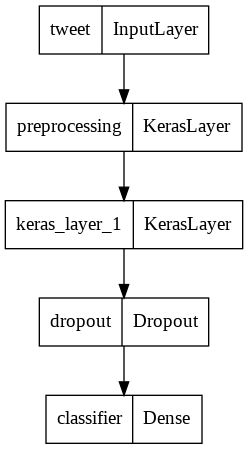

In [ ]:
tf.keras.utils.plot_model(modelSimple)

als zusätzliche Evaluierungsmetrik -> f1 (Precision, Recall)

In [ ]:
import keras.backend as K

def metrics_recall(data_true, data_pred):
    true_positives = K.sum(K.round(K.clip(data_true*data_pred,0,1)))
    possible_positives = K.sum(K.round(K.clip(data_true,0,1)))

    recall = true_positives / (possible_positives+K.epsilon())
    return recall


def metrics_precision(data_true, data_pred):
    true_positives = K.sum(K.round(K.clip(data_true*data_pred,0,1)))

    positives_predicted = K.sum(K.round(K.clip(data_pred,0,1)))
    precision = true_positives / (positives_predicted+K.epsilon())
    return precision


def metrics_f1(data_true, data_pred):
    precision_data = metrics_precision(data_true, data_pred)
    recall_data = metrics_recall(data_true, data_pred)
    return 2*(precision_data*recall_data)/(precision_data+recall_data+K.epsilon())

In [ ]:
#print(model.summary())

In [ ]:
#model.layers[1].get_weights()[0].shape

In [ ]:

batch_size = 32
validation_split=0.2

the following comes from https://colab.research.google.com/github/tensorflow/text/blob/master/docs/tutorials/classify_text_with_bert.ipynb#scrollTo=P9eP2y9dbw32

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [ ]:
!pip install -q tf-models-official
from official.nlp import optimization

In [ ]:
training_epochs = 3

steps_per_epoch = 32
#steps_per_epoch = tf.data.experimental.cardinality(dataset).numpy()
num_train_steps = steps_per_epoch * training_epochs
num_warmup_steps = int(0.1*num_train_steps)

#init_lr = 3e-5
init_lr = 2e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
modelSimple.compile(loss=loss, optimizer=optimizer ,metrics=metrics)
#modelSimple.compile(loss=loss, optimizer=optimizer ,metrics=metrics)#noch nicht probiert



fit works with dataset -> from tensors, but not with from tensor_slices.. why?

In [ ]:
modelSimple.fit(training_sentences[32:319], training_labels[32:319], batch_size=batch_size, epochs=training_epochs)
#modelSimple.fit(whole_training_dataset.take(2), batch_size=batch_size, epochs=training_epochs)
#modelSimple.fit(train_ds, batch_size=batch_size, epochs=training_epochs)

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


9/9 [==============================] - 448s 47s/step - loss: 0.6756 - binary_accuracy: 0.5993
Epoch 2/3
3/9 [=========>....................] - ETA: 4:41 - loss: 0.6131 - binary_accuracy: 0.6562

need to verify, if that still works...

In [ ]:
#(loss,accuracy, metrics_recall, metrics_precision,
#metrics_f1) = modelSimple.evaluate(testing_sentences, testing_labels, verbose=1)
(metrics) = modelSimple.evaluate(testing_sentences[50:110], testing_labels[50:110], verbose=1)

In [ ]:
BERTPredict=modelSimple.predict(x=testing_sentences[15:100])

In [ ]:
#for p in LSTM_predict80AE:
 # print(p)

In [ ]:
prediction_rounded = np.round(BERTPredict)

for p in prediction_rounded:
  print(p)


#print(nptesting_labels[200:210])

https://deeplizard.com/learn/video/km7pxKy4UHU

Quelle der def plot_confusion_matrix: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py 

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(y_true=testing_labels[15:100], y_pred=prediction_rounded)

In [ ]:
plot_labels = ['no hatespeech','hatespeech']

In [ ]:
plot_confusion_matrix(cm=cm, classes=plot_labels, title='LSTM Confusion 60 with 9 epochs, batch size 40')